"""
Summary:
This is a project looking a the top 20 most financially successful US movies and how variables such as duration, release date, actor, director, genre, user rating correlate to gross income. You'll see three main sections in this notebook:

Step 1: Set Up Analysis and Jupyter Notebook
Step 2: Data Cleaning
Step 3: Exploratory Data Analysis
Step 4: Insights and Discussions of Analysis


Acknowledgement:
Thanks to Stefano Leone's dataset sourced at https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset that consists of 81K+ movies scraped from IMDb.

"""

# STEP 1:  SET UP ANALYSIS AND JUPYTER NOTEBOOK

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np


In [78]:
#Read excel file into pandas dataframe ("df") in Jupyter Notebook
MoviesDf=pd.read_excel('IMDb movies.xlsx')
MoviesDf.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26 00:00:00,"Biography, Crime, Drama",70.0,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537.0,2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911.0,1911-08-19 00:00:00,Drama,53.0,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171.0,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912.0,1912-11-13 00:00:00,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420.0,45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911.0,1911-03-06 00:00:00,"Adventure, Drama, Fantasy",68.0,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019.0,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912.0,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438.0,NaN,NaN,NaN,NaN,12.0,5.0


# STEP 2: DATA CLEANING

In [79]:
#High level look at the df
MoviesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81274 non-null  object 
 1   title                  81271 non-null  object 
 2   original_title         81271 non-null  object 
 3   year                   81273 non-null  float64
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  float64
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76947 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78842 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

In [80]:
# Check on the number of genres and notice too many are lumped together
print(MoviesDf.genre.nunique())
print(MoviesDf.genre.unique())

1264
['Biography, Crime, Drama' 'Drama' 'Drama, History' ...
 'Adventure, History, Sci-Fi' 'Animation, Music' nan]


In [81]:
# Separate original column "genre" that contains multiple genres into genre, genre2 and genre3.
MoviesDf[['genre','genre2','genre3']] = MoviesDf['genre'].str.split(',',expand=True)
MoviesDf.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre2,genre3
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26 00:00:00,Biography,70.0,Australia,NaN,Charles Tait,...,6.1,537.0,2250,NaN,NaN,NaN,7.0,7.0,Crime,Drama
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911.0,1911-08-19 00:00:00,Drama,53.0,"Germany, Denmark",NaN,Urban Gad,...,5.9,171.0,NaN,NaN,NaN,NaN,4.0,2.0,None,None
2,tt0002101,Cleopatra,Cleopatra,1912.0,1912-11-13 00:00:00,Drama,100.0,USA,English,Charles L. Gaskill,...,5.2,420.0,45000,NaN,NaN,NaN,24.0,3.0,History,None
3,tt0002130,L'Inferno,L'Inferno,1911.0,1911-03-06 00:00:00,Adventure,68.0,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2019.0,NaN,NaN,NaN,NaN,28.0,14.0,Drama,Fantasy
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912.0,1913,Biography,60.0,USA,English,Sidney Olcott,...,5.7,438.0,NaN,NaN,NaN,NaN,12.0,5.0,Drama,None


In [82]:
print(MoviesDf.genre.nunique()) #number of unique values in genre
print(MoviesDf.genre.unique()) #list of unique values in genre: 23


23
['Biography' 'Drama' 'Adventure' 'History' 'Crime' 'Western' 'Fantasy'
 'Comedy' 'Horror' 'Family' 'Action' 'Romance' 'Mystery' 'Animation'
 'Sci-Fi' 'Musical' 'Thriller' 'Music' 'Film-Noir' 'War' 'Sport' 'Adult'
 'Documentary' nan]


In [83]:
print(MoviesDf.genre2.nunique()) #number of unique values in genre2
print(MoviesDf.genre2.unique()) #list of unique values in genre2: 25


25
[' Crime' None ' History' ' Drama' ' War' ' Fantasy' ' Mystery' ' Family'
 ' Adventure' ' Romance' ' Comedy' ' Western' ' Horror' ' Thriller'
 ' Sport' ' Sci-Fi' ' Action' ' Music' ' Musical' ' Film-Noir'
 ' Biography' ' Animation' ' Reality-TV' ' Game-Show' ' News' nan]


In [84]:
print(MoviesDf.genre3.nunique()) #number of unique values in genre3
print(MoviesDf.genre3.unique()) #list of unique values in genre3: 23


23
[' Drama' None ' Fantasy' ' Romance' ' Mystery' ' Horror' ' History'
 ' Adventure' ' War' ' Crime' ' Sci-Fi' ' Western' ' Family' ' Sport'
 ' Thriller' ' Comedy' ' Musical' ' Film-Noir' ' Music' ' Biography'
 ' Action' ' Animation' ' Reality-TV' nan]


In [85]:
# Renaming columns
MoviesDf.rename(columns={'genre':'genre1','usa_gross_income': 'USAGrossIncome', 'worlwide_gross_income':'WorldwideGrossIncome','reviews_from_users':'UsersReviews','reviews_from_critics':'CriticsReviews'},inplace=True)
MoviesDf.tail()

,imdb_title_id,title,original_title,year,date_published,genre1,duration,country,language,director,...,avg_vote,votes,budget,USAGrossIncome,WorldwideGrossIncome,metascore,UsersReviews,CriticsReviews,genre2,genre3
81269,tt9905412,Ottam,Ottam,2019.0,2019-03-08 00:00:00,Drama,120.0,India,Malayalam,Zam,...,7.8,510.0,INR 4000000,NaN,4791,NaN,NaN,NaN,None,None
81270,tt9905462,Pengalila,Pengalila,2019.0,2019-03-08 00:00:00,Drama,111.0,India,Malayalam,T.V. Chandran,...,8.4,604.0,INR 10000000,NaN,NaN,NaN,NaN,NaN,None,None
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,2019-03-08 00:00:00,Drama,130.0,India,Malayalam,Vineesh Aaradya,...,8.4,369.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
81272,tt9914286,Sokagin √áocuklari,Sokagin √áocuklari,2019.0,2019-03-15 00:00:00,Drama,98.0,Turkey,Turkish,Ahmet Faik Akinci,...,7.2,190.0,NaN,NaN,2833,NaN,NaN,NaN,Family,None
81273,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
MoviesDf.info()
#Now there are 24 (+2) columns after splitting genre into 3 separate genres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         81274 non-null  object 
 1   title                 81271 non-null  object 
 2   original_title        81271 non-null  object 
 3   year                  81273 non-null  float64
 4   date_published        81273 non-null  object 
 5   genre1                81273 non-null  object 
 6   duration              81273 non-null  float64
 7   country               81234 non-null  object 
 8   language              80518 non-null  object 
 9   director              81200 non-null  object 
 10  writer                79780 non-null  object 
 11  production_company    76947 non-null  object 
 12  actors                81207 non-null  object 
 13  description           78842 non-null  object 
 14  avg_vote              81273 non-null  float64
 15  votes              

In [87]:
# Convert columns to float and replace Nan with '0'
MoviesDf['USAGrossIncome']=pd.to_numeric(MoviesDf['USAGrossIncome'], errors='coerce').fillna(0)
MoviesDf['WorldwideGrossIncome']=pd.to_numeric(MoviesDf['WorldwideGrossIncome'], errors='coerce').fillna(0)
MoviesDf['budget']=pd.to_numeric(MoviesDf['budget'], errors='coerce').fillna(0)
MoviesDf['metascore']=pd.to_numeric(MoviesDf['metascore'], errors='coerce').fillna(0)
MoviesDf['UsersReviews']=pd.to_numeric(MoviesDf['UsersReviews'], errors='coerce').fillna(0)
MoviesDf['CriticsReviews']=pd.to_numeric(MoviesDf['CriticsReviews'], errors='coerce').fillna(0)


In [88]:
# Convert columns to string and fill NaN with '-'
MoviesDf['actors']=MoviesDf['actors'].astype(str).fillna('-')
MoviesDf['title']=MoviesDf['title'].astype(str).fillna('-')
MoviesDf['original_title']=MoviesDf['original_title'].astype(str).fillna('-')
MoviesDf['country']=MoviesDf['country'].astype(str).fillna('-')
MoviesDf['language']=MoviesDf['language'].astype(str).fillna('-')
MoviesDf['director']=MoviesDf['director'].astype(str).fillna('-')
MoviesDf['writer']=MoviesDf['writer'].astype(str).fillna('-')
MoviesDf['production_company']=MoviesDf['production_company'].astype(str).fillna('-')
MoviesDf['description']=MoviesDf['description'].astype(str).fillna('-')


In [89]:
MoviesDf.info()
#Shows the revised data types after above modifications are made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         81274 non-null  object 
 1   title                 81274 non-null  object 
 2   original_title        81274 non-null  object 
 3   year                  81273 non-null  float64
 4   date_published        81273 non-null  object 
 5   genre1                81273 non-null  object 
 6   duration              81273 non-null  float64
 7   country               81274 non-null  object 
 8   language              81274 non-null  object 
 9   director              81274 non-null  object 
 10  writer                81274 non-null  object 
 11  production_company    81274 non-null  object 
 12  actors                81274 non-null  object 
 13  description           81274 non-null  object 
 14  avg_vote              81273 non-null  float64
 15  votes              

In [90]:
#add a new column category next to avg_vote 
category3 = pd.cut(MoviesDf.avg_vote,bins=[0.0,4.0,7.0,10.0],labels=['Pass','Maybe','See!'])
MoviesDf.insert(15,'AvgVoteClass',category3)
MoviesDf.tail()


,imdb_title_id,title,original_title,year,date_published,genre1,duration,country,language,director,...,AvgVoteClass,votes,budget,USAGrossIncome,WorldwideGrossIncome,metascore,UsersReviews,CriticsReviews,genre2,genre3
81269,tt9905412,Ottam,Ottam,2019.0,2019-03-08 00:00:00,Drama,120.0,India,Malayalam,Zam,...,See!,510.0,0.0,0.0,4791.0,0.0,0.0,0.0,None,None
81270,tt9905462,Pengalila,Pengalila,2019.0,2019-03-08 00:00:00,Drama,111.0,India,Malayalam,T.V. Chandran,...,See!,604.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,2019-03-08 00:00:00,Drama,130.0,India,Malayalam,Vineesh Aaradya,...,See!,369.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
81272,tt9914286,Sokagin √áocuklari,Sokagin √áocuklari,2019.0,2019-03-15 00:00:00,Drama,98.0,Turkey,Turkish,Ahmet Faik Akinci,...,See!,190.0,0.0,0.0,2833.0,0.0,0.0,0.0,Family,None
81273,END,nan,nan,NaN,NaN,NaN,NaN,nan,nan,nan,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [91]:
# Check out data contained in these columns
MoviesDf[['director','writer','language','production_company','AvgVoteClass']].tail()

,director,writer,language,production_company,AvgVoteClass
81269,Zam,Rajesh k Narayan,Malayalam,Thomas Thiruvalla Films,See!
81270,T.V. Chandran,T.V. Chandran,Malayalam,Benzy Productions,See!
81271,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",Malayalam,RMCC Productions,See!
81272,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim U√ßkan",Turkish,Gizem Ajans,See!
81273,nan,nan,nan,nan,NaN


In [92]:
# Separate first name in original column "actors" that has multiple actors and put in new column "lead_actor"
MoviesDf['lead_actor'] = MoviesDf['actors'].str.split(',').str[0]

# Separate first country in orig column "country" that has multiple countries and put in new column "lead_country"
MoviesDf['lead_country'] = MoviesDf['country'].str.split(',').str[0]

# Separate first language in orig column "language" that has multiple languages and put in new column "1stLanguage"
MoviesDf['1stLanguage'] = MoviesDf['language'].str.split(',').str[0]

# Separate first director in orig column "director" that has multiple directors and put in new column "1stDirector"
MoviesDf['1stDirector'] = MoviesDf['director'].str.split(',').str[0]

# Separate first writer in orig column "writer" that has multiple writers and put in new column "1stWriter"
MoviesDf['1stWriter'] = MoviesDf['writer'].str.split(',').str[0]

# Separate first prod comp in orig col "production_company" with multiple prod cos. and put in new col "1stProdCo"
MoviesDf['1stProdCo'] = MoviesDf['production_company'].str.split(',').str[0]

MoviesDf.info()
#MoviesDf now has 30 columns, which is 6 more as a result of new columns created above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81273 non-null  float64 
 4   date_published        81273 non-null  object  
 5   genre1                81273 non-null  object  
 6   duration              81273 non-null  float64 
 7   country               81274 non-null  object  
 8   language              81274 non-null  object  
 9   director              81274 non-null  object  
 10  writer                81274 non-null  object  
 11  production_company    81274 non-null  object  
 12  actors                81274 non-null  object  
 13  description           81274 non-null  object  
 14  avg_vote              81273 non-null  float64 
 15  Av

In [93]:
# Function to a) move one or more columns, that are not next to each other, and move them all to a 
# new location before/after another column or b) reorder the columns at the same time.

def movecol(MoviesDf, cols_to_move=[], ref_col='', place='After'):
    
    cols = MoviesDf.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(MoviesDf[seg1 + seg2 + seg3])

MoviesDf = movecol(MoviesDf, 
             cols_to_move=['genre1'], #indicate one or more 'column's you want to move 
             ref_col='genre2', # the reference column
             place='Before') #indicate where you want to place the moving cols--'Before' or 'After' the ref_col

MoviesDf.info()

#Below shows genre1, genre2 and genre3 columns are now next to each other in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81273 non-null  float64 
 4   date_published        81273 non-null  object  
 5   duration              81273 non-null  float64 
 6   country               81274 non-null  object  
 7   language              81274 non-null  object  
 8   director              81274 non-null  object  
 9   writer                81274 non-null  object  
 10  production_company    81274 non-null  object  
 11  actors                81274 non-null  object  
 12  description           81274 non-null  object  
 13  avg_vote              81273 non-null  float64 
 14  AvgVoteClass          81273 non-null  category
 15  vo

In [94]:
# Remove '.0' from year and duration columns
MoviesDf['year'] = MoviesDf['year'].astype(str).replace('\.0', '', regex=True)
MoviesDf['duration'] = MoviesDf['duration'].astype(float).replace('\.0', '', regex=True)
MoviesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81274 non-null  object  
 4   date_published        81273 non-null  object  
 5   duration              81273 non-null  float64 
 6   country               81274 non-null  object  
 7   language              81274 non-null  object  
 8   director              81274 non-null  object  
 9   writer                81274 non-null  object  
 10  production_company    81274 non-null  object  
 11  actors                81274 non-null  object  
 12  description           81274 non-null  object  
 13  avg_vote              81273 non-null  float64 
 14  AvgVoteClass          81273 non-null  category
 15  vo

In [95]:
#Convert 'date_published" to datetime dtype
MoviesDf['date_published'] = pd.to_datetime(MoviesDf['date_published'], errors='coerce')
MoviesDf.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_title_id         81274 non-null  object        
 1   title                 81274 non-null  object        
 2   original_title        81274 non-null  object        
 3   year                  81274 non-null  object        
 4   date_published        77250 non-null  datetime64[ns]
 5   duration              81273 non-null  float64       
 6   country               81274 non-null  object        
 7   language              81274 non-null  object        
 8   director              81274 non-null  object        
 9   writer                81274 non-null  object        
 10  production_company    81274 non-null  object        
 11  actors                81274 non-null  object        
 12  description           81274 non-null  object        
 13  avg_vote        

In [96]:
# Extract month from date_published column
MoviesDf['month'] = pd.DatetimeIndex(MoviesDf['date_published']).month

# Remove '.0' from month
MoviesDf['month'] = MoviesDf['month'].astype(str).replace('\.0', '', regex=True)

# Using the predefined 'movecol' function, move column 'month' to after 'year' 
MoviesDf = movecol(MoviesDf, 
             cols_to_move=['month'], 
             ref_col='year', 
             place='After') 


MoviesDf.head(2)

,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,CriticsReviews,genre1,genre2,genre3,lead_actor,lead_country,1stLanguage,1stDirector,1stWriter,1stProdCo
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12,1906-12-26,70.0,Australia,nan,Charles Tait,...,7.0,Biography,Crime,Drama,Elizabeth Tait,Australia,nan,Charles Tait,Charles Tait,J. and N. Tait
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911,8,1911-08-19,53.0,"Germany, Denmark",nan,Urban Gad,...,2.0,Drama,None,None,Asta Nielsen,Germany,nan,Urban Gad,Urban Gad,Fotorama


# ____________


# STEP 3: EXPLORATORY DATA ANALYSIS
    

# What factors determine the financial success of US movies?

In [97]:
# 1. Create new df called 'USMoviesDf' by filtering 'USA' from 'lead_country' in MoviesDf
is_USA =  MoviesDf['lead_country']=='USA'
USMoviesDf=MoviesDf[is_USA]

print(USMoviesDf.info())
# USMoviesDf has 29,712 titles compared to 81K titles in MoviesDf 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29712 entries, 2 to 81265
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_title_id         29712 non-null  object        
 1   title                 29712 non-null  object        
 2   original_title        29712 non-null  object        
 3   year                  29712 non-null  object        
 4   month                 29712 non-null  object        
 5   date_published        28357 non-null  datetime64[ns]
 6   duration              29712 non-null  float64       
 7   country               29712 non-null  object        
 8   language              29712 non-null  object        
 9   director              29712 non-null  object        
 10  writer                29712 non-null  object        
 11  production_company    29712 non-null  object        
 12  actors                29712 non-null  object        
 13  description     

In [98]:
# 2. Filter USMoviesDf to a new df called USMoviesDf2 with preferred columns
filt =['year','month','title','1stWriter','1stDirector','1stLanguage','lead_country','lead_actor','genre1','1stProdCo','description','duration','UsersReviews',
       'CriticsReviews','avg_vote','AvgVoteClass','budget','USAGrossIncome']
USMoviesDf2 = USMoviesDf[filt]
USMoviesDf2.tail()


,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,USAGrossIncome
81252,2018,12,Nightmare Tenant,Scott Collette,Robert Malenfant,English,USA,Karlisha Hurley,Thriller,nan,"Dr. Carol Allen (Lauralee Bell), a kind-hearte...",90.0,7.0,2.0,5.5,Maybe,0.0,0.0
81253,2019,8,Falling Inn Love,Elizabeth Hackett,Roger Kumble,English,USA,Christina Milian,Comedy,nan,When city girl Gabriela spontaneously enters a...,98.0,219.0,30.0,5.6,Maybe,0.0,0.0
81254,2019,1,Abduction 101,Robin Entreinger,Robin Entreinger,English,USA,Luna Labelle,Horror,Seven Light,Three beautiful women find a strange house in ...,77.0,14.0,3.0,2.4,Pass,500000.0,0.0
81257,2018,12,Paranormal Investigation,nan,Franck Phelizon,French,USA,Jose Atuncar,Horror,Baril Pictures,When a young man becomes possessed after playi...,92.0,332.0,11.0,3.7,Pass,0.0,0.0
81265,2019,4,The Pilgrim's Progress,John Bunyan,Robert Fernandez,English,USA,David Thorpe,Animation,Cat In The Mill Studio,"An epic journey, faithfully adapted to modern-...",108.0,20.0,3.0,5.0,Maybe,0.0,1294596.0


In [99]:
#add a new column category called RevenueClass next to USAGrossIncome 
category = pd.cut(USMoviesDf2.USAGrossIncome,bins=[0,1000000.0,100000000.0,250000000.0,500000000.0,1000000000000.0],labels=['<=$1M','<=$100M','<=$250','<=$500M','>$500M'])
USMoviesDf2.insert(18,'RevenueClass',category)
USMoviesDf2.tail(2)

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,USAGrossIncome,RevenueClass
81257,2018,12,Paranormal Investigation,nan,Franck Phelizon,French,USA,Jose Atuncar,Horror,Baril Pictures,When a young man becomes possessed after playi...,92.0,332.0,11.0,3.7,Pass,0.0,0.0,NaN
81265,2019,4,The Pilgrim's Progress,John Bunyan,Robert Fernandez,English,USA,David Thorpe,Animation,Cat In The Mill Studio,"An epic journey, faithfully adapted to modern-...",108.0,20.0,3.0,5.0,Maybe,0.0,1294596.0,<=$100M


In [100]:
#add a new column category next to budget based on budget levels
category1 = pd.cut(USMoviesDf2.budget,bins=[0,1000000.0,100000000.0,250000000.0,500000000.0,1000000000000.0],labels=['<=$1M','<=$100M','<=$250','<=$500M','>$500M'])
USMoviesDf2.insert(17,'BudgetClass',category1)
USMoviesDf2.head(2)

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
2,1912,11,Cleopatra,Victorien Sardou,Charles L. Gaskill,English,USA,Helen Gardner,Drama,Helen Gardner Picture Players,The fabled queen of Egypt's affair with Roman ...,100.0,24.0,3.0,5.2,Maybe,45000.0,<=$1M,0.0,NaN
4,1912,nan,"From the Manger to the Cross; or, Jesus of Naz...",Gene Gauntier,Sidney Olcott,English,USA,R. Henderson Bland,Biography,Kalem Company,"An account of the life of Jesus Christ, based ...",60.0,12.0,5.0,5.7,Maybe,0.0,NaN,0.0,NaN


In [101]:
# General and quick assessment of the numerical columns
USMoviesDf2.describe()


,duration,UsersReviews,CriticsReviews,avg_vote,budget,USAGrossIncome
count,29712.000000,29712.000000,29712.000000,29712.000000,2.971200e+04,2.971200e+04
mean,94.069029,72.657983,36.613893,5.607078,6.079335e+06,8.564550e+06
std,18.586816,222.254182,73.059714,1.291569,2.080610e+07,3.398784e+07
min,40.000000,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00
25%,85.000000,8.000000,3.000000,4.800000,0.000000e+00,0.000000e+00
50%,92.000000,17.000000,10.000000,5.800000,0.000000e+00,0.000000e+00
75%,102.000000,48.000000,32.000000,6.500000,1.200000e+06,6.914475e+04
max,398.000000,8302.000000,987.000000,10.000000,3.560000e+08,9.366622e+08


In [107]:
USMoviesDf2.corr()

,duration,UsersReviews,CriticsReviews,avg_vote,budget,USAGrossIncome
duration,1.000000,0.288107,0.308748,0.242756,0.295135,0.264446
UsersReviews,0.288107,1.000000,0.710710,0.238088,0.609020,0.688682
CriticsReviews,0.308748,0.710710,1.000000,0.288408,0.676166,0.653756
avg_vote,0.242756,0.238088,0.288408,1.000000,0.166513,0.207378
budget,0.295135,0.609020,0.676166,0.166513,1.000000,0.763373
USAGrossIncome,0.264446,0.688682,0.653756,0.207378,0.763373,1.000000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

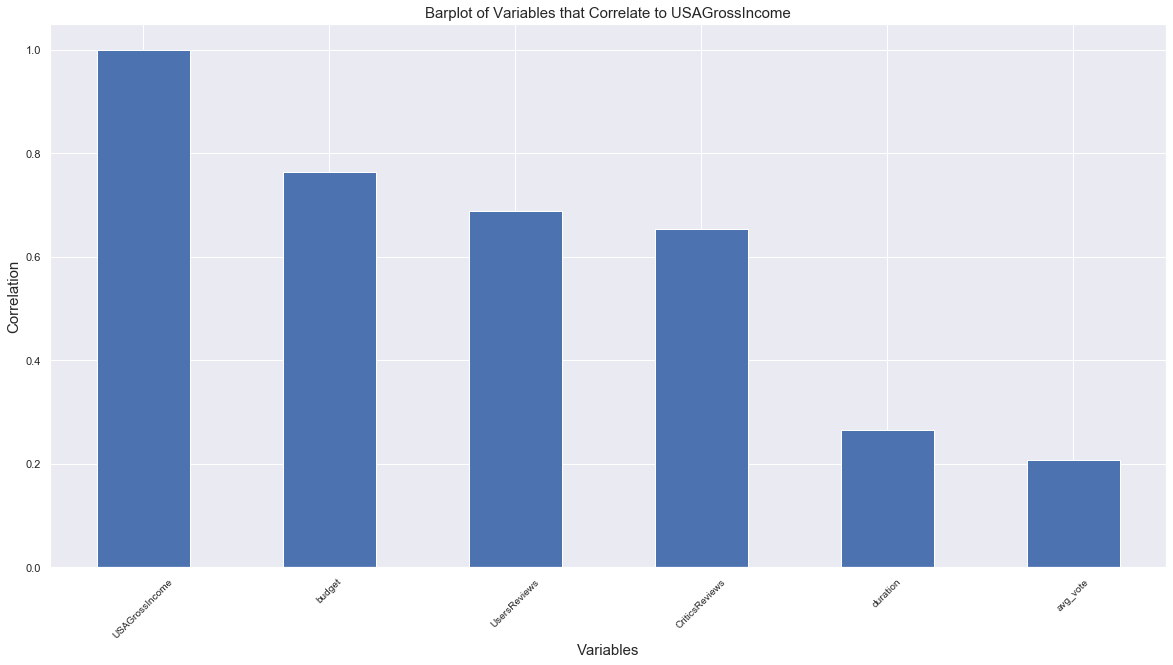

In [111]:
corr = USMoviesDf2.corr()
corr = corr.sort_values("USAGrossIncome", ascending=False)
corr["USAGrossIncome"].plot(kind='bar')
plt.title("Barplot of Variables that Correlate to USAGrossIncome", size=15)
plt.ylabel("Correlation", size=15)
plt.xlabel("Variables", size=15)
plt.xticks(rotation=45, size=10)

In [104]:
# Calculate Quartiles

# Create two new variables called Q1 and Q3--quartiles
filt2 = ['duration', 'UsersReviews', 'CriticsReviews', 'avg_vote', 'budget', 'USAGrossIncome']
USMoviesFilt = USMoviesDf2[filt2]

Q1 = USMoviesFilt.quantile(0.25)
print(Q1)

Q3 = USMoviesFilt.quantile(0.75)
print(Q3)

#(ii) Calculate the interquartile range (IQR = Q3 - Q1) for all columns in the dataframe and print it to the screen.
IQR = Q3-Q1
print(IQR)


duration          85.0
UsersReviews       8.0
CriticsReviews     3.0
avg_vote           4.8
budget             0.0
USAGrossIncome     0.0
Name: 0.25, dtype: float64
duration              102.00
UsersReviews           48.00
CriticsReviews         32.00
avg_vote                6.50
budget            1200000.00
USAGrossIncome      69144.75
Name: 0.75, dtype: float64
duration               17.00
UsersReviews           40.00
CriticsReviews         29.00
avg_vote                1.70
budget            1200000.00
USAGrossIncome      69144.75
dtype: float64


In [112]:
# Gauge outliers

#i. The number of entries in the original dataframe.
print ("i. When we did NOT removed any outliers from the dataset, we have " + str(len(USMoviesFilt.index))  + " entries/rows.") 

#ii. The number of entries if you were to remove the outliers.
removed_outliers = USMoviesFilt[~((USMoviesFilt < (Q1 - 1.5 * IQR)) |(USMoviesFilt > (Q3 + 1.5 * IQR))).any(axis=1)] #Bitwise operators!
print ("ii. After we removed outliers from the dataset, we have " + str(len(removed_outliers.index))  + " entries/rows.")

#iii. The proportion of outliers that exist in the dataset.
outliers = ((len(USMoviesFilt.index) - len(removed_outliers.index))/len(USMoviesFilt.index))*100
print ("iii. The proportion of outliers that exist when compared to the original dataframe is " + str(round(outliers,1)) + '%.')


i. When we did NOT removed any outliers from the dataset, we have 29712 entries/rows.
ii. After we removed outliers from the dataset, we have 19716 entries/rows.
iii. The proportion of outliers that exist when compared to the original dataframe is 33.6%.


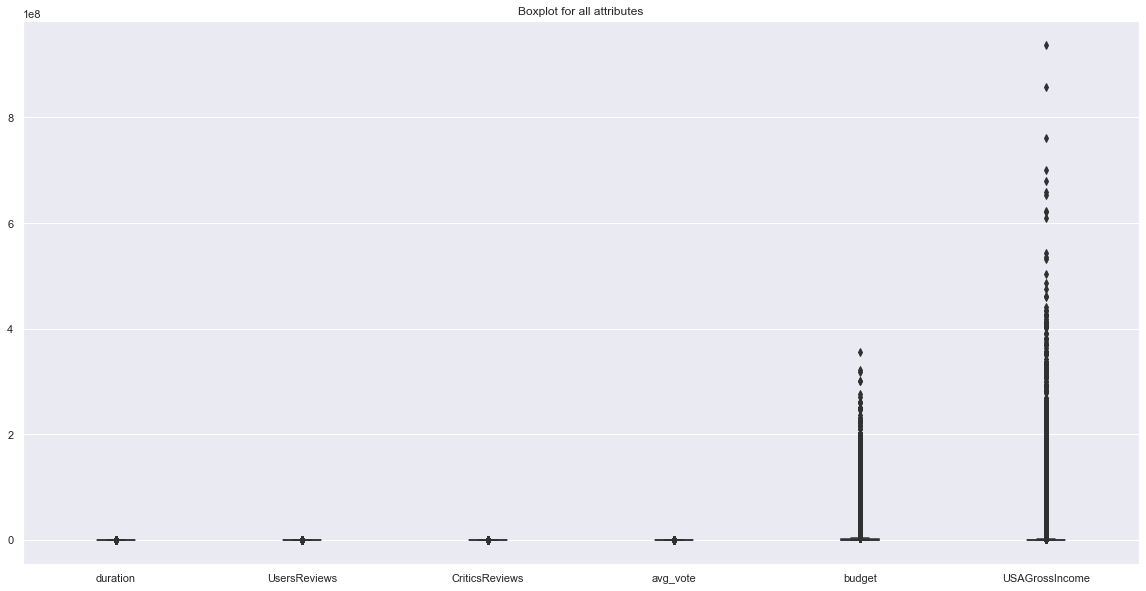

In [113]:
# Boxplot of all attributes using seaborn
Boxplot = sns.boxplot(data=USMoviesFilt, width=0.2, palette="colorblind").set_title("Boxplot for all attributes")
Boxplot = sns.set(rc={'figure.figsize':(20,10)})


# Factor 1: LEAD ACTOR

In [114]:
#pip install sidetable
#6/2020: Pandas utility library called sidetable, which makes it easy to build a frequency table and simple summary of missing values at the start of exploratory analysis of a df.-Chris Moffitt 

import sidetable #stb


In [133]:
#Use .stb.freq() to build a FREQUENCY table to show how many votes were included with count, cumulative totals and percentages:
#Use the thresh argument to group all of the rest into an “Others” category--give countries that contributed 50% of total

# Get lead_actor and USA income for a film; threshold of 50% and put the rest of lead actors in 'Remaining'
Actor_Rev = USMoviesDf2.stb.freq(['lead_actor'], value='USAGrossIncome', thresh=50.0, other_label='Remaining')
Actor_Rev

,lead_actor,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Robert Downey Jr.,4.234295e+09,1.663967,4.234295e+09,1.663967
1,Tom Hanks,4.143856e+09,1.628427,8.378151e+09,3.292393
2,Tom Cruise,3.302951e+09,1.297973,1.168110e+10,4.590367
3,Harrison Ford,2.996795e+09,1.177662,1.467790e+10,5.768029
4,Will Smith,2.816416e+09,1.106778,1.749431e+10,6.874806
...,...,...,...,...,...
101,Morgan Freeman,5.603291e+08,0.220195,1.253650e+11,49.265170
102,Felicity Jones,5.570780e+08,0.218917,1.259221e+11,49.484087
103,Andy Serkis,5.321859e+08,0.209135,1.264543e+11,49.693223
104,Wesley Snipes,5.232715e+08,0.205632,1.269776e+11,49.898855


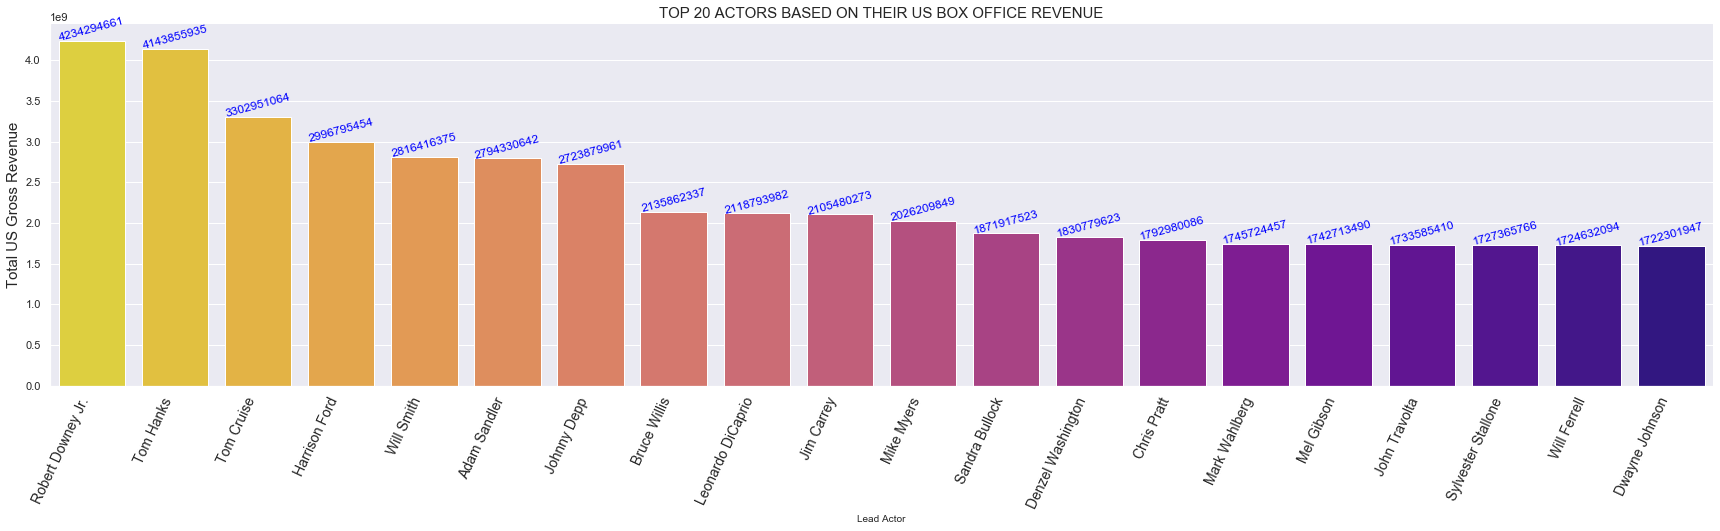

In [134]:

sns.catplot(x="lead_actor", y="USAGrossIncome", kind='bar', height=6, aspect=4, palette="plasma_r", data=Actor_Rev.iloc[0:20])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 20 ACTORS BASED ON THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('Lead Actor', fontsize=10)
plt.ylabel('Total US Gross Revenue', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='baseline', rotation=15) #???use ('${:,d}'.format(int(t.get_text())))???

plt.show()

In [136]:
RDJr = USMoviesDf2[USMoviesDf2.lead_actor == 'Robert Downey Jr.']
RDJr


,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
22944,1988,11,1969,Ernest Thompson,Ernest Thompson,English,USA,Robert Downey Jr.,Drama,Atlantic Entertainment Group,Two friends living in a small town during the ...,95.0,31.0,16.0,5.8,Maybe,0.0,NaN,5979011.0,<=$100M
26530,1993,8,Heart and Souls,Gregory Hansen,Ron Underwood,English,USA,Robert Downey Jr.,Comedy,Universal Pictures,An unhappy businessman finds a new sense of pu...,104.0,77.0,18.0,6.9,Maybe,25000000.0,<=$100M,16589540.0,<=$100M
28432,1995,2,Restoration,Rose Tremain,Michael Hoffman,English,USA,Robert Downey Jr.,Biography,Avenue Pictures,The exiled royal physician to King Charles II ...,117.0,49.0,28.0,6.6,Maybe,19000000.0,<=$100M,4005941.0,<=$100M
40494,2003,11,The Singing Detective,Dennis Potter,Keith Gordon,English,USA,Robert Downey Jr.,Comedy,Icon Productions,"From his hospital bed, a writer suffering from...",109.0,79.0,64.0,5.5,Maybe,8000000.0,<=$100M,337174.0,<=$1M
42619,2008,5,Iron Man,Mark Fergus,Jon Favreau,Hungarian,USA,Robert Downey Jr.,Action,Paramount Pictures,"After being held captive in an Afghan cave, bi...",126.0,1250.0,526.0,7.9,See!,140000000.0,<=$250,318604126.0,<=$500M
42693,2005,11,Kiss Kiss Bang Bang,Brett Halliday,Shane Black,English,USA,Robert Downey Jr.,Action,Warner Bros.,A murder mystery brings together a private eye...,103.0,367.0,240.0,7.5,See!,15000000.0,<=$100M,4243756.0,<=$100M
49418,2012,4,The Avengers,Joss Whedon,Joss Whedon,English,USA,Robert Downey Jr.,Action,Marvel Studios,Earth's mightiest heroes must come together an...,143.0,1859.0,738.0,8.0,See!,220000000.0,<=$250,623357910.0,>$500M
50719,2009,12,Sherlock Holmes,Michael Robert Johnson,Guy Ritchie,English,USA,Robert Downey Jr.,Action,Warner Bros.,Detective Sherlock Holmes and his stalwart par...,128.0,667.0,423.0,7.6,See!,90000000.0,<=$100M,209028679.0,<=$250
53538,2010,4,Iron Man 2,Justin Theroux,Jon Favreau,English,USA,Robert Downey Jr.,Action,Paramount Pictures,With the world now aware of his identity as Ir...,124.0,821.0,483.0,7.0,Maybe,200000000.0,<=$250,312433331.0,<=$500M
53597,2010,11,Due Date,Alan R. Cohen,Todd Phillips,English,USA,Robert Downey Jr.,Adventure,Warner Bros.,High-strung father-to-be Peter Highman is forc...,95.0,309.0,311.0,6.5,Maybe,65000000.0,<=$100M,100539043.0,<=$250


### Above result shows that Robert Downey Jr. is the top actor whose films have made over $4.2B in the US market. He is followed by Tom Hanks, Tom Cruise, Harrison Ford, and Will Smith to round out the top 5 grossing actors.

In [118]:
RDJr


,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
22944,1988,11,1969,Ernest Thompson,Ernest Thompson,English,USA,Robert Downey Jr.,Drama,Atlantic Entertainment Group,Two friends living in a small town during the ...,95.0,31.0,16.0,5.8,Maybe,0.0,NaN,5979011.0,<=$100M
26530,1993,8,Heart and Souls,Gregory Hansen,Ron Underwood,English,USA,Robert Downey Jr.,Comedy,Universal Pictures,An unhappy businessman finds a new sense of pu...,104.0,77.0,18.0,6.9,Maybe,25000000.0,<=$100M,16589540.0,<=$100M
28432,1995,2,Restoration,Rose Tremain,Michael Hoffman,English,USA,Robert Downey Jr.,Biography,Avenue Pictures,The exiled royal physician to King Charles II ...,117.0,49.0,28.0,6.6,Maybe,19000000.0,<=$100M,4005941.0,<=$100M
40494,2003,11,The Singing Detective,Dennis Potter,Keith Gordon,English,USA,Robert Downey Jr.,Comedy,Icon Productions,"From his hospital bed, a writer suffering from...",109.0,79.0,64.0,5.5,Maybe,8000000.0,<=$100M,337174.0,<=$1M
42619,2008,5,Iron Man,Mark Fergus,Jon Favreau,Hungarian,USA,Robert Downey Jr.,Action,Paramount Pictures,"After being held captive in an Afghan cave, bi...",126.0,1250.0,526.0,7.9,See!,140000000.0,<=$250,318604126.0,<=$500M
42693,2005,11,Kiss Kiss Bang Bang,Brett Halliday,Shane Black,English,USA,Robert Downey Jr.,Action,Warner Bros.,A murder mystery brings together a private eye...,103.0,367.0,240.0,7.5,See!,15000000.0,<=$100M,4243756.0,<=$100M
49418,2012,4,The Avengers,Joss Whedon,Joss Whedon,English,USA,Robert Downey Jr.,Action,Marvel Studios,Earth's mightiest heroes must come together an...,143.0,1859.0,738.0,8.0,See!,220000000.0,<=$250,623357910.0,>$500M
50719,2009,12,Sherlock Holmes,Michael Robert Johnson,Guy Ritchie,English,USA,Robert Downey Jr.,Action,Warner Bros.,Detective Sherlock Holmes and his stalwart par...,128.0,667.0,423.0,7.6,See!,90000000.0,<=$100M,209028679.0,<=$250
53538,2010,4,Iron Man 2,Justin Theroux,Jon Favreau,English,USA,Robert Downey Jr.,Action,Paramount Pictures,With the world now aware of his identity as Ir...,124.0,821.0,483.0,7.0,Maybe,200000000.0,<=$250,312433331.0,<=$500M
53597,2010,11,Due Date,Alan R. Cohen,Todd Phillips,English,USA,Robert Downey Jr.,Adventure,Warner Bros.,High-strung father-to-be Peter Highman is forc...,95.0,309.0,311.0,6.5,Maybe,65000000.0,<=$100M,100539043.0,<=$250


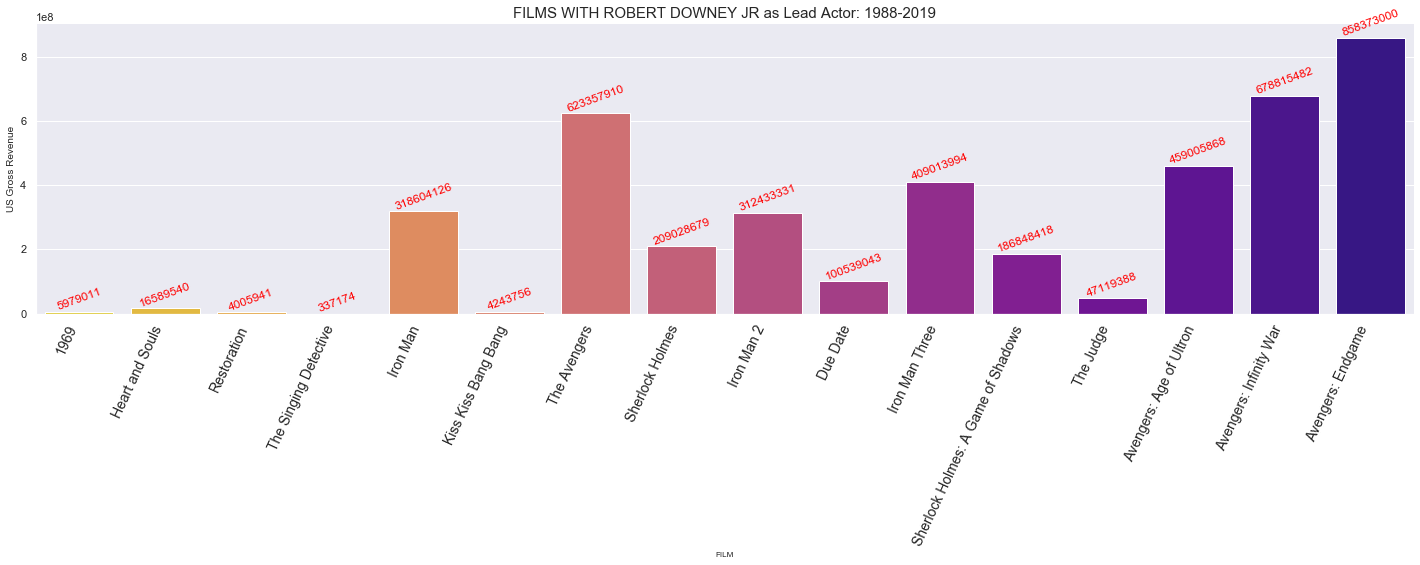

In [135]:

sns.catplot(x="title", y="USAGrossIncome", kind='bar', height=5, aspect=4, palette="plasma_r", data=RDJr)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('FILMS WITH ROBERT DOWNEY JR as Lead Actor: 1988-2019', fontsize=15)
plt.xlabel('FILM', fontsize=8)
plt.ylabel('US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches--adding annotation to bars
for p in ax.patches: 
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=20)

plt.show()


### Robert Downey Jr. is the top grossing actor and was lead actor in 16 films between 1988 and 2019.  His major hits were action films while his drama, biography and comedy films only had mild success.

# _______________

# FACTOR 2: FILM GENRE

In [137]:
Genre1_Rev = USMoviesDf2.stb.freq(['genre1'], value='USAGrossIncome')
Genre1_Rev.head(10)

,genre1,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Action,8.674508e+10,34.088540,8.674508e+10,34.088540
1,Comedy,6.204933e+10,24.383759,1.487944e+11,58.472299
2,Animation,2.934830e+10,11.533112,1.781427e+11,70.005411
3,Drama,2.858049e+10,11.231384,2.067232e+11,81.236795
4,Adventure,1.474656e+10,5.795011,2.214698e+11,87.031805
5,Crime,1.054770e+10,4.144969,2.320175e+11,91.176774
6,Biography,9.426518e+09,3.704374,2.414440e+11,94.881149
7,Horror,9.219929e+09,3.623190,2.506639e+11,98.504339
8,Family,1.132881e+09,0.445193,2.517968e+11,98.949531
9,Mystery,1.086931e+09,0.427135,2.528837e+11,99.376666


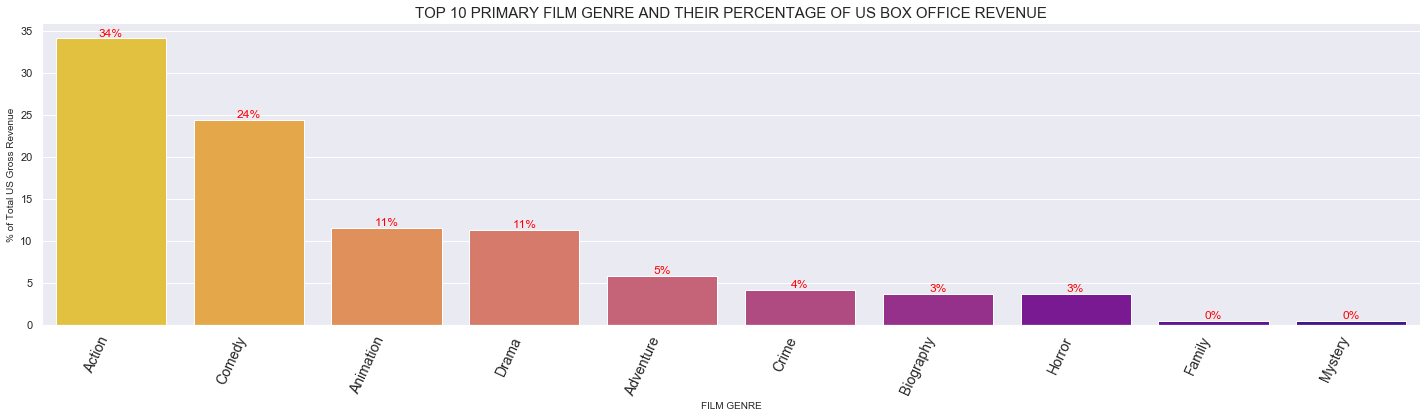

In [138]:
sns.catplot(x="genre1", y="percent", kind='bar', height=5, aspect=4, palette="plasma_r", data=Genre1_Rev.iloc[0:10])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 10 PRIMARY FILM GENRE AND THEIR PERCENTAGE OF US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('FILM GENRE', fontsize=10)
plt.ylabel('% of Total US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()) + "%", 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

### Action is the most profitable genre comprising 34% of total US revenue. Comedy is at 24% followed by Animation (11%), Drama (11%), Adventure (5%) and Crime (4%).

# ___________________________

# FACTOR 3: FILM RELEASE MONTH

In [139]:
Month_Rev = USMoviesDf2.stb.freq(['month'], value='USAGrossIncome')
Month_Rev


,month,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,7,2.812977e+10,11.054260,2.812977e+10,11.054260
1,12,2.551587e+10,10.027068,5.364564e+10,21.081328
2,3,2.434390e+10,9.566514,7.798954e+10,30.647842
3,8,2.311204e+10,9.082424,1.011016e+11,39.730266
4,10,2.246891e+10,8.829693,1.235705e+11,48.559959
5,4,2.112418e+10,8.301250,1.446947e+11,56.861209
6,6,2.083272e+10,8.186711,1.655274e+11,65.047920
7,5,1.993740e+10,7.834876,1.854648e+11,72.882796
8,2,1.904995e+10,7.486129,2.045147e+11,80.368924
9,1,1.754098e+10,6.893145,2.220557e+11,87.262069


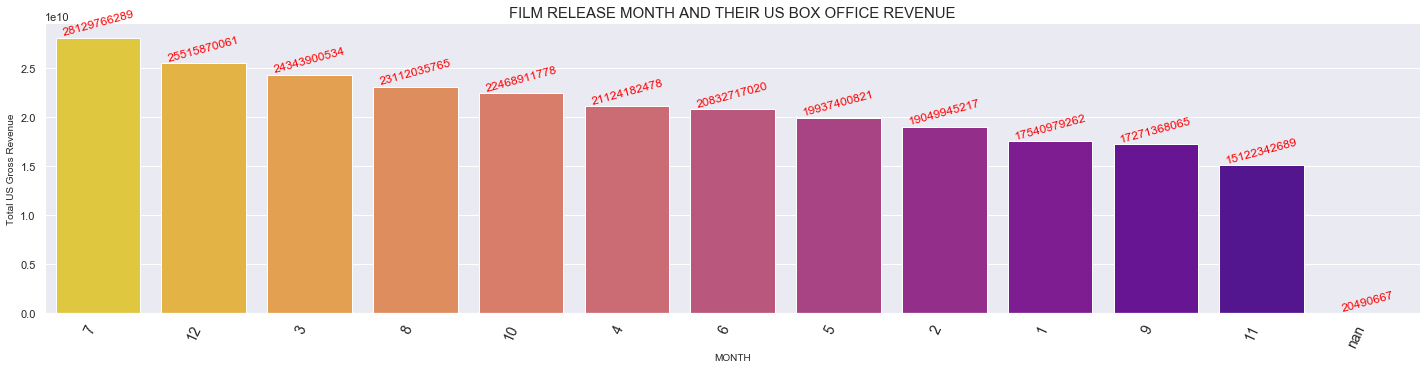

In [140]:
sns.catplot(x="month", y="USAGrossIncome", kind='bar', height=5, aspect=4, palette="plasma_r", data=Month_Rev, order=Month_Rev.sort_values('USAGrossIncome',ascending = False).month)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('FILM RELEASE MONTH AND THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('MONTH', fontsize=10)
plt.ylabel('Total US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=15)

plt.show()

### Films released in July, December and March pulled in the most revenue historically. July and December releases are popular since they are tied to summer and Christmas times that traditionally saw high movie attendance. However, it seems film releases in other months had also done well.

# FACTOR 4: FILM BUDGET

In [142]:
#add a new column category next to USAGrossIncome 
category2 = pd.cut(USMoviesDf2.budget,bins=[0,5000000.0,100000000.0,200000000.0,300000000.0,500000000.0],labels=['<=$5M','<=$100M','<=$200','<=$300M','>$500M'])
USMoviesDf2.insert(17,'BudgetClass',category2)
USMoviesDf2.tail()

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,description,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
81252,2018,12,Nightmare Tenant,Scott Collette,Robert Malenfant,English,USA,Karlisha Hurley,Thriller,nan,"Dr. Carol Allen (Lauralee Bell), a kind-hearte...",90.0,7.0,2.0,5.5,Maybe,0.0,NaN,0.0,NaN
81253,2019,8,Falling Inn Love,Elizabeth Hackett,Roger Kumble,English,USA,Christina Milian,Comedy,nan,When city girl Gabriela spontaneously enters a...,98.0,219.0,30.0,5.6,Maybe,0.0,NaN,0.0,NaN
81254,2019,1,Abduction 101,Robin Entreinger,Robin Entreinger,English,USA,Luna Labelle,Horror,Seven Light,Three beautiful women find a strange house in ...,77.0,14.0,3.0,2.4,Pass,500000.0,<=$1M,0.0,NaN
81257,2018,12,Paranormal Investigation,nan,Franck Phelizon,French,USA,Jose Atuncar,Horror,Baril Pictures,When a young man becomes possessed after playi...,92.0,332.0,11.0,3.7,Pass,0.0,NaN,0.0,NaN
81265,2019,4,The Pilgrim's Progress,John Bunyan,Robert Fernandez,English,USA,David Thorpe,Animation,Cat In The Mill Studio,"An epic journey, faithfully adapted to modern-...",108.0,20.0,3.0,5.0,Maybe,0.0,NaN,1294596.0,<=$100M


In [143]:
Budget_Rev = USMoviesDf2.stb.freq(['BudgetClass'], value='USAGrossIncome')
Budget_Rev


,BudgetClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,<=$100M,1.735531e+11,73.151917,1.735531e+11,73.151917
1,<=$250,5.773081e+10,24.333295,2.312839e+11,97.485212
2,<=$500M,4.190512e+09,1.766283,2.354745e+11,99.251495
3,<=$1M,1.775830e+09,0.748505,2.372503e+11,100.000000


In [192]:
print(USMoviesDf2.loc[USMoviesDf2['BudgetClass'] == '>$500M']) 
# No movie had a budget exceeding $500M. 

USMoviesDf2.loc[USMoviesDf2['BudgetClass'] == '<=$500M'].sort_values(by='USAGrossIncome', ascending=False) 
# 10 films had a budget of $250-$500M and the highest budgeted film is Avengers: Endgame at $356M.


Empty DataFrame
Columns: [year, Decade, month, title, 1stWriter, 1stDirector, 1stLanguage, lead_country, lead_actor, genre1, 1stProdCo, description, duration, DurationClass, UsersReviews, CriticsReviews, avg_vote, AvgVoteClass, budget, BudgetClass, RevenueClass, IncBudDiff, IncPercentofBud, USAGrossIncome]
Index: []

[0 rows x 24 columns]


,year,Decade,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,...,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,RevenueClass,IncBudDiff,IncPercentofBud,USAGrossIncome
71243,2019,2010s,4,Avengers: Endgame,Christopher Markus,Anthony Russo,English,USA,Robert Downey Jr.,Action,...,8302.0,531.0,8.5,See!,356000000.0,<=$500M,>$500M,502373000.0,141.116011,858373000.0
71242,2018,2010s,4,Avengers: Infinity War,Christopher Markus,Anthony Russo,English,USA,Robert Downey Jr.,Action,...,4111.0,591.0,8.5,See!,321000000.0,<=$500M,>$500M,357815482.0,111.468998,678815482.0
65276,2017,2010s,12,Star Wars: Episode VIII - The Last Jedi,Rian Johnson,Rian Johnson,English,USA,Mark Hamill,Action,...,6218.0,690.0,7.1,See!,317000000.0,<=$500M,>$500M,303181382.0,95.640815,620181382.0
76606,2019,2010s,7,The Lion King,Jeff Nathanson,Jon Favreau,English,USA,Chiwetel Ejiofor,Animation,...,2445.0,339.0,7.0,Maybe,260000000.0,<=$500M,>$500M,283496835.0,109.037244,543496835.0
44344,2007,2000s,5,Spider-Man 3,Sam Raimi,Sam Raimi,English,USA,Tobey Maguire,Action,...,2011.0,413.0,6.2,Maybe,258000000.0,<=$500M,<=$500M,78530303.0,30.438102,336530303.0
45864,2007,2000s,5,Pirates of the Caribbean: At World's End,Ted Elliott,Gore Verbinski,Mandarin,USA,Johnny Depp,Action,...,1272.0,324.0,7.1,See!,300000000.0,<=$500M,<=$500M,9420425.0,3.140142,309420425.0
50575,2017,2010s,11,Justice League,Jerry Siegel,Zack Snyder,English,USA,Ben Affleck,Action,...,1906.0,475.0,6.4,Maybe,300000000.0,<=$500M,<=$250,-70975705.0,-23.658568,229024295.0
70054,2018,2010s,5,Solo: A Star Wars Story,Jonathan Kasdan,Ron Howard,English,USA,Alden Ehrenreich,Action,...,2342.0,529.0,6.9,Maybe,275000000.0,<=$500M,<=$250,-61232488.0,-22.266359,213767512.0
43793,2010,2010s,1,Tangled,Dan Fogelman,Nathan Greno,English,USA,Mandy Moore,Animation,...,445.0,337.0,7.7,See!,260000000.0,<=$500M,<=$250,-59178064.0,-22.760794,200821936.0
41702,2006,2000s,7,Superman Returns,Michael Dougherty,Bryan Singer,English,USA,Brandon Routh,Action,...,2399.0,443.0,6.0,Maybe,270000000.0,<=$500M,<=$250,-69918808.0,-25.895855,200081192.0


In [193]:
print(USMoviesDf2['BudgetClass'].value_counts(normalize=True))

# 62% (7,239) of US movies have budgets between $1M and $100M. About 35% (4,060) of American films have $1M or less budgets 
# and nearly 3% (311) of films are $100-250M and under 1% (10) are over $250M-$500M range.


<=$100M    0.622978
<=$1M      0.349398
<=$250     0.026764
<=$500M    0.000861
>$500M     0.000000
Name: BudgetClass, dtype: float64


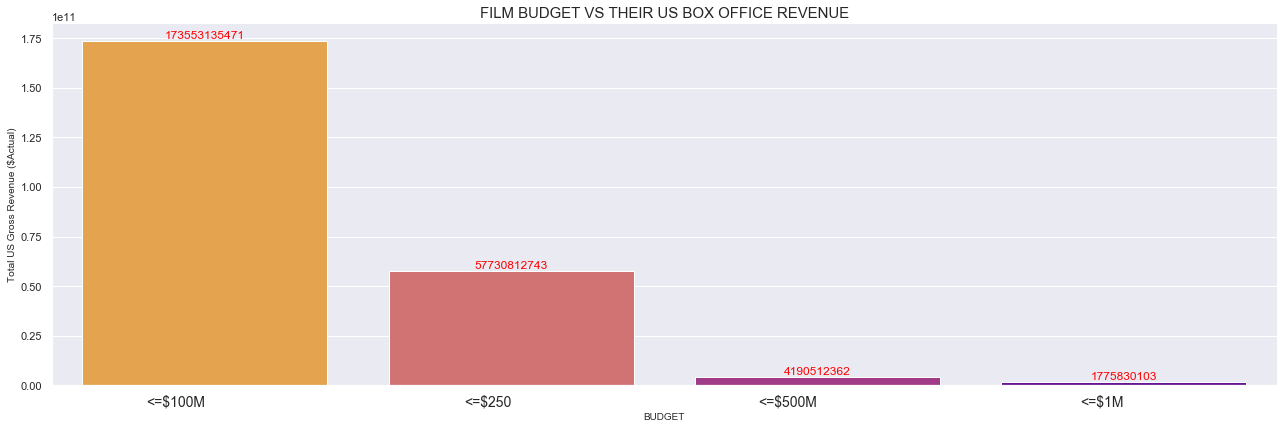

In [144]:
sns.catplot(x="BudgetClass", y="USAGrossIncome", kind='bar', height=6, aspect=3, palette="plasma_r", data=Budget_Rev, order=Budget_Rev.sort_values('USAGrossIncome',ascending = False).BudgetClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('FILM BUDGET VS THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('BUDGET', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

# _________________

# FACTOR 5: AVERAGE USER VOTES

In [145]:
# How do average user reviews correlate to US revenue?
AvgVote_Rev = USMoviesDf2.stb.freq(['AvgVoteClass'], value='USAGrossIncome')
AvgVote_Rev

,AvgVoteClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Maybe,1.605466e+11,63.090615,1.605466e+11,63.090615
1,See!,9.153805e+10,35.972053,2.520847e+11,99.062668
2,Pass,2.385228e+09,0.937332,2.544699e+11,100.000000


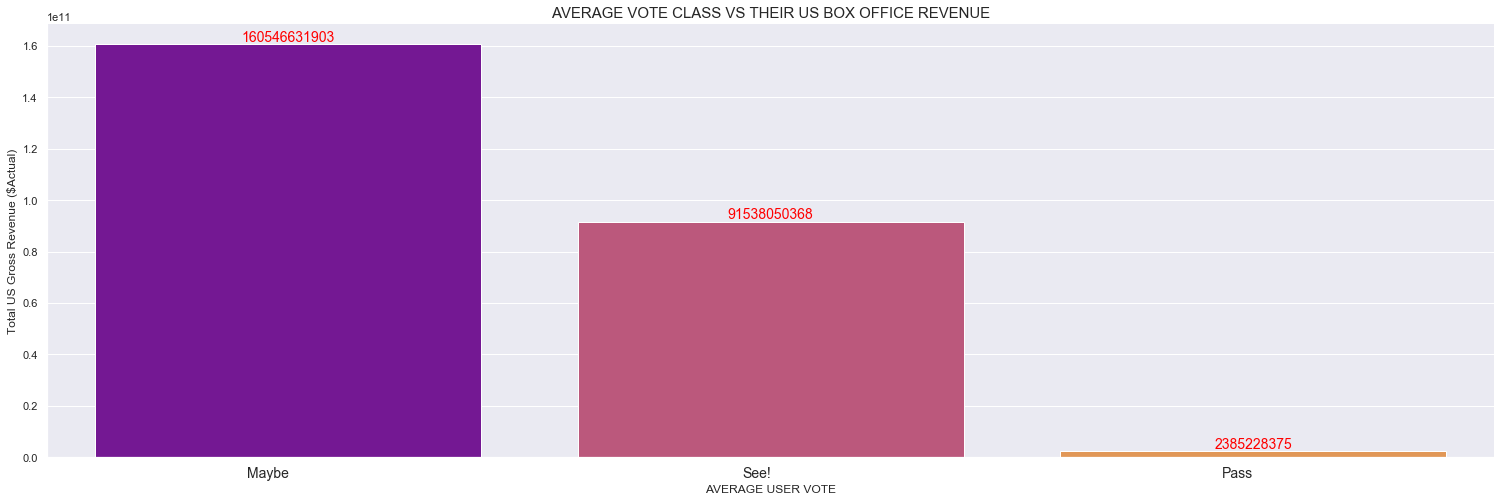

In [146]:
sns.catplot(x="AvgVoteClass", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="plasma", data=AvgVote_Rev, order=AvgVote_Rev.sort_values('USAGrossIncome',ascending = False).AvgVoteClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('AVERAGE VOTE CLASS VS THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('AVERAGE USER VOTE', fontsize=12)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=12)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='red', ha='center', va='bottom', rotation=0)

plt.show()

### Reclassified user average vote into 3 bins: Pass (1-4 rating), Maybe (5-7), and See! (8-10). "Maybe" films were the most popular and took in '$161B (63%) in revenue. Surprisingly, "Yes!" films came in second and generated $915 M. The "Pass" films only generated $239M (below 1%).

# FACTOR 6: FILM DURATION

In [147]:
#add a new column DurationClass next to duration, which is split into 5 bins
category4 = pd.cut(USMoviesDf2.duration,bins=[0,60,90,120,180,400],labels=['<=60min','<=90min','<=120min','<=180min','>180min'])
USMoviesDf2.insert(12,'DurationClass',category4)
USMoviesDf2.head()

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,...,duration,DurationClass,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
2,1912,11,Cleopatra,Victorien Sardou,Charles L. Gaskill,English,USA,Helen Gardner,Drama,Helen Gardner Picture Players,...,100.0,<=120min,24.0,3.0,5.2,Maybe,45000.0,<=$1M,0.0,NaN
4,1912,nan,"From the Manger to the Cross; or, Jesus of Naz...",Gene Gauntier,Sidney Olcott,English,USA,R. Henderson Bland,Biography,Kalem Company,...,60.0,<=60min,12.0,5.0,5.7,Maybe,0.0,NaN,0.0,NaN
15,1914,5,"Home, Sweet Home",D.W. Griffith,D.W. Griffith,English,USA,Henry B. Walthall,Drama,Majestic Motion Picture Company,...,55.0,<=60min,6.0,0.0,5.7,Maybe,0.0,NaN,0.0,NaN
17,1913,11,Traffic in Souls,nan,George Loane Tucker,English,USA,Jane Gail,Crime,Independent Moving Pictures Co. of America (IMP),...,88.0,<=90min,13.0,10.0,6.1,Maybe,5700.0,<=$1M,0.0,NaN
20,1914,8,The Avenging Conscience: or 'Thou Shalt Not Kill',Edgar Allan Poe,D.W. Griffith,English,USA,Henry B. Walthall,Crime,Majestic Motion Picture Company,...,78.0,<=90min,14.0,11.0,6.5,Maybe,0.0,NaN,0.0,NaN


In [148]:
# How does duration of a film correlate to US revenue?

# Number of films grouped by duration
Duration_Count = USMoviesDf2.stb.freq(['DurationClass'])
print(Duration_Count)

# Gross revenue grouped by duration
Duration_Rev = USMoviesDf2.stb.freq(['DurationClass'], value='USAGrossIncome')
Duration_Rev

  DurationClass  count    percent  cumulative_count  cumulative_percent
0      <=120min  14537  48.926360             14537           48.926360
1       <=90min  12895  43.399973             27432           92.326333
2      <=180min   1665   5.603796             29097           97.930129
3       <=60min    500   1.682822             29597           99.612951
4       >180min    115   0.387049             29712          100.000000


,DurationClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,<=120min,1.451586e+11,57.043538,1.451586e+11,57.043538
1,<=180min,7.978381e+10,31.352945,2.249425e+11,88.396483
2,<=90min,2.644449e+10,10.391992,2.513869e+11,98.788474
3,>180min,2.978964e+09,1.170655,2.543659e+11,99.959129
4,<=60min,1.040046e+08,0.040871,2.544699e+11,100.000000


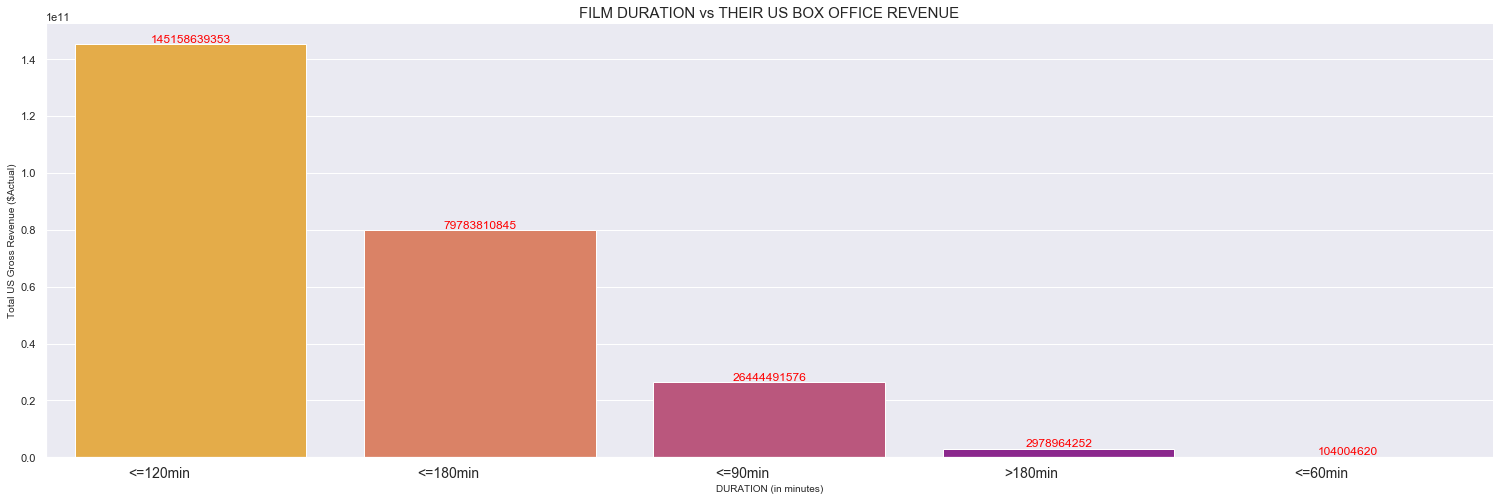

In [149]:
sns.catplot(x="DurationClass", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="plasma_r", data=Duration_Rev, order=Duration_Rev.sort_values('USAGrossIncome',ascending = False).DurationClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('FILM DURATION vs THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('DURATION (in minutes)', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % (p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

### Almost all films are 90-180 minutes long. Films over 90 mins and up to 2 hours represented nearly 49% of all films and they generated $145B (57%) of revenue. Films 2-2.5 hours comprised 43% and took in $798M in revenue.

# FACTOR 7: LEAD DIRECTOR

In [150]:
#How does director correlate with gross revenue?

# Number of films grouped by director
Director_Count = USMoviesDf2.stb.freq(['1stDirector'])
print(Director_Count.head(10))

# Get 1stDirector and USA income for a film; threshold of 50% and put the rest of directors in 'Remaining'
Director_Rev = USMoviesDf2.stb.freq(['1stDirector'], value='USAGrossIncome', thresh=50.0, other_label='Remaining')
Director_Rev

          1stDirector  count   percent  cumulative_count  cumulative_percent
0      Michael Curtiz     89  0.299542                89            0.299542
1         Lloyd Bacon     77  0.259155               166            0.558697
2           John Ford     70  0.235595               236            0.794292
3    William Beaudine     69  0.232229               305            1.026521
4      Gordon Douglas     66  0.222132               371            1.248654
5      Richard Thorpe     64  0.215401               435            1.464055
6     Lesley Selander     64  0.215401               499            1.679456
7        Mervyn LeRoy     63  0.212036               562            1.891492
8       Norman Taurog     58  0.195207               620            2.086699
9  William A. Wellman     56  0.188476               676            2.275175


,1stDirector,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Steven Spielberg,4.388392e+09,1.724523,4.388392e+09,1.724523
1,Anthony Russo,2.281004e+09,0.896375,6.669396e+09,2.620898
2,Michael Bay,2.273656e+09,0.893487,8.943052e+09,3.514385
3,Ron Howard,2.061266e+09,0.810023,1.100432e+10,4.324408
4,Robert Zemeckis,1.978715e+09,0.777583,1.298303e+10,5.101992
...,...,...,...,...,...
154,Robert Luketic,4.210471e+08,0.165460,1.257124e+11,49.401676
155,J.A. Bayona,4.177198e+08,0.164153,1.261301e+11,49.565829
156,Louis Leterrier,4.157458e+08,0.163377,1.265459e+11,49.729206
157,Brian Levant,4.155921e+08,0.163317,1.269615e+11,49.892523


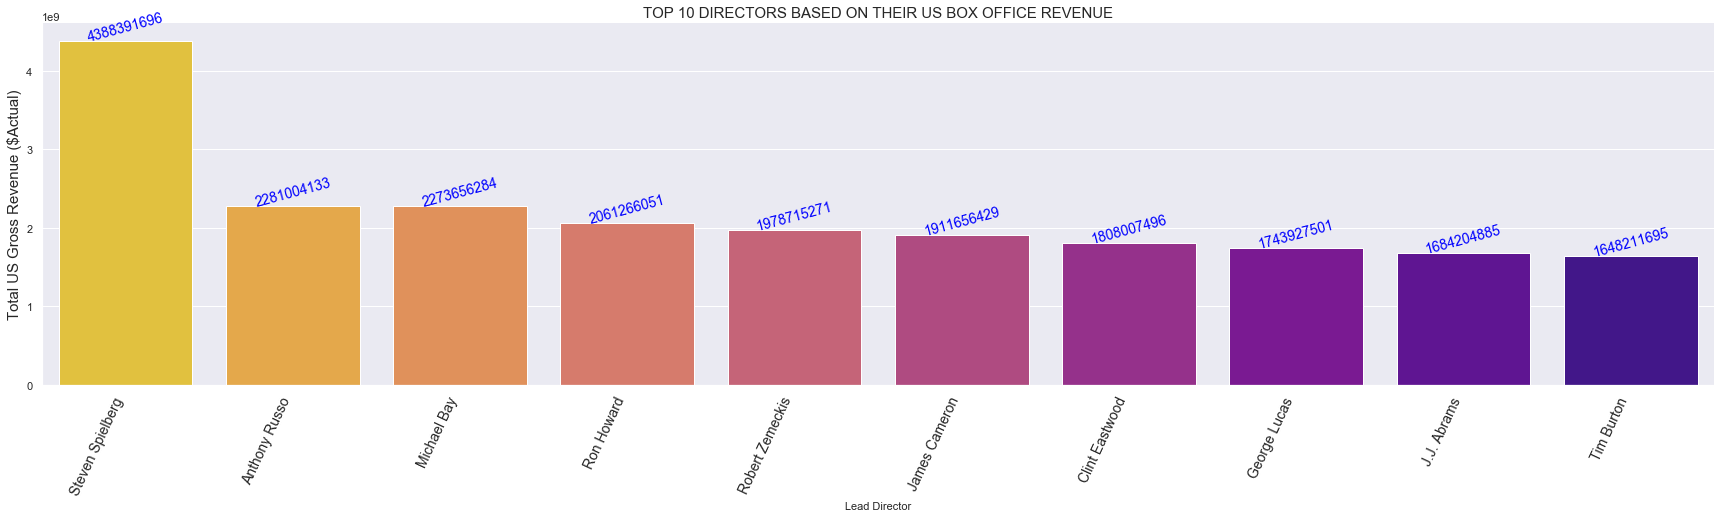

In [151]:
sns.catplot(x="1stDirector", y="USAGrossIncome", kind='bar', height=6, aspect=4, palette="plasma_r", data=Director_Rev.iloc[0:10])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 10 DIRECTORS BASED ON THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('Lead Director', fontsize=11)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='blue', ha='center', va='baseline', rotation=15) 
    
plt.show()


In [152]:
Spielberg = USMoviesDf2[USMoviesDf2['1stDirector'] == 'Steven Spielberg']
Spielberg.head()

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,...,duration,DurationClass,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
11693,1964,3,Firelight,Steven Spielberg,Steven Spielberg,English,USA,Robert Robyn,Sci-Fi,nan,...,140.0,<=180min,2.0,1.0,5.6,Maybe,400.0,<=$1M,0.0,NaN
16178,1974,11,The Sugarland Express,Hal Barwood,Steven Spielberg,English,USA,Goldie Hawn,Crime,Universal Pictures,...,110.0,<=120min,71.0,64.0,6.8,Maybe,3000000.0,<=$100M,7500000.0,<=$100M
16457,1975,12,Jaws,Peter Benchley,Steven Spielberg,English,USA,Roy Scheider,Adventure,Zanuck/Brown Productions,...,124.0,<=180min,1150.0,282.0,8.0,See!,7000000.0,<=$100M,260000000.0,<=$500M
17274,1977,3,Close Encounters of the Third Kind,Steven Spielberg,Steven Spielberg,English,USA,Richard Dreyfuss,Drama,Julia Phillips and Michael Phillips Productions,...,138.0,<=180min,410.0,220.0,7.6,See!,20000000.0,<=$100M,135189114.0,<=$250
18116,1979,12,1941,Robert Zemeckis,Steven Spielberg,English,USA,Dan Aykroyd,Action,Universal Pictures,...,118.0,<=120min,237.0,68.0,5.8,Maybe,35000000.0,<=$100M,31755742.0,<=$100M


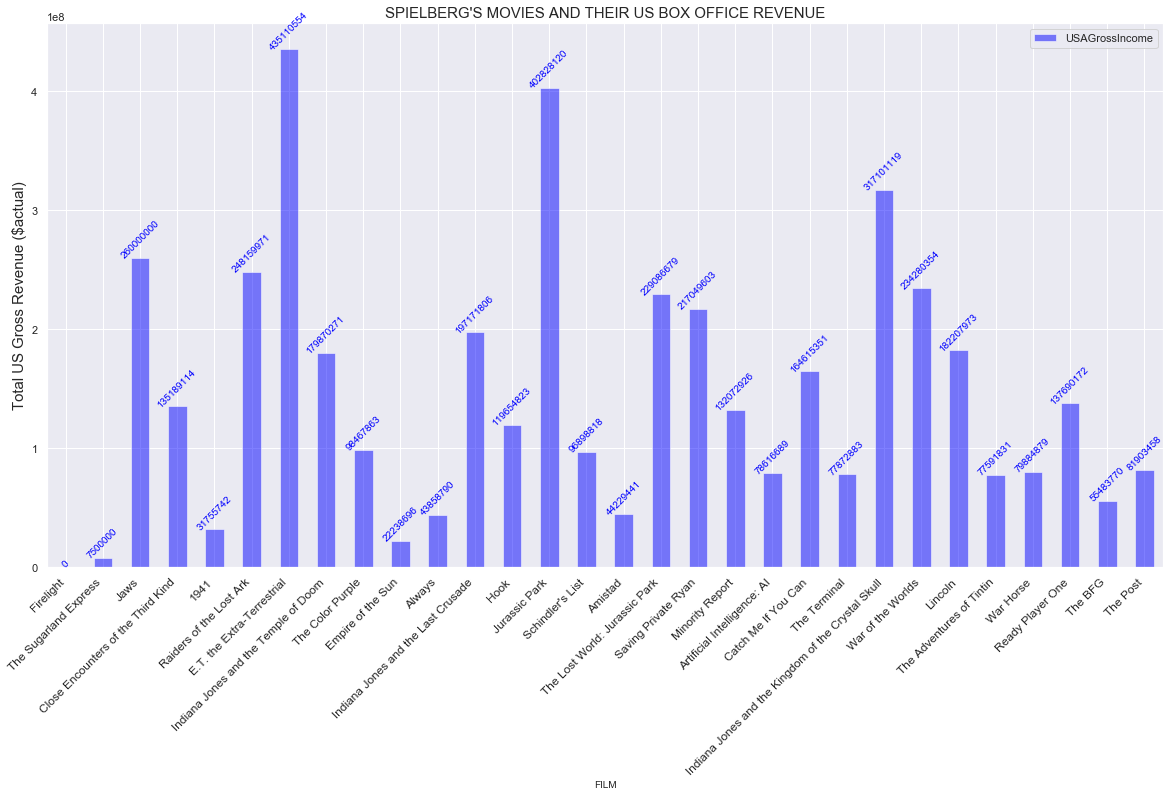

In [153]:
Spielberg.plot(x='title', y='USAGrossIncome', kind='bar', color='blue', alpha=.5, figsize=(20,10))
plt.xticks(horizontalalignment='right', fontsize=12, rotation=45)
plt.title("SPIELBERG'S MOVIES AND THEIR US BOX OFFICE REVENUE", fontsize=15)
plt.xlabel('FILM', fontsize=10)
plt.ylabel('Total US Gross Revenue ($actual)', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='blue', ha='center', va='baseline', rotation=45) 
plt.show()

### Steven Spielberg has made 30 movies from 1964 to 2017 that cumulatively made $4.4B revenue in the US. Interestingly, the top 10 directors who made the most films did not appear in the top 10 directors who generated the most revenue.

# US FILMS

In [154]:
# Classify US films by decade

def classifier(row):
    if row["year"] <= '1919': 
        return "1910s"
    if row['year'] <= '1929':
        return "1920s"
    if row['year'] <= '1939':
        return "1930s"
    if row['year'] <= '1949':
        return "1940s"
    if row['year'] <= '1959':
        return "1950s"
    if row['year'] <= '1969':
        return "1960s"
    if row['year'] <= '1979':
        return "1970s"
    if row['year'] <= '1989':
        return "1980s"
    if row['year'] <= '1999':
        return "1990s"
    if row['year'] <= '2009':
        return "2000s"
    else:
        return "2010s"
    
    
USMoviesDf2["Decade"] = USMoviesDf2.apply(classifier, axis=1)
USMoviesDf2.tail()


/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,...,DurationClass,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass,Decade
81252,2018,12,Nightmare Tenant,Scott Collette,Robert Malenfant,English,USA,Karlisha Hurley,Thriller,nan,...,<=90min,7.0,2.0,5.5,Maybe,0.0,NaN,0.0,NaN,2010s
81253,2019,8,Falling Inn Love,Elizabeth Hackett,Roger Kumble,English,USA,Christina Milian,Comedy,nan,...,<=120min,219.0,30.0,5.6,Maybe,0.0,NaN,0.0,NaN,2010s
81254,2019,1,Abduction 101,Robin Entreinger,Robin Entreinger,English,USA,Luna Labelle,Horror,Seven Light,...,<=90min,14.0,3.0,2.4,Pass,500000.0,<=$1M,0.0,NaN,2010s
81257,2018,12,Paranormal Investigation,nan,Franck Phelizon,French,USA,Jose Atuncar,Horror,Baril Pictures,...,<=120min,332.0,11.0,3.7,Pass,0.0,NaN,0.0,NaN,2010s
81265,2019,4,The Pilgrim's Progress,John Bunyan,Robert Fernandez,English,USA,David Thorpe,Animation,Cat In The Mill Studio,...,<=120min,20.0,3.0,5.0,Maybe,0.0,NaN,1294596.0,<=$100M,2010s


In [155]:
#Using lambda, add specified column(s) in df where each value will be calculated based on 2 other columns for each row. 
USMoviesDf2 = USMoviesDf2.assign(IncBudDiff = lambda x: (x['USAGrossIncome'] - x['budget']))
USMoviesDf2 = USMoviesDf2.assign(IncPercentofBud = lambda x: (x['IncBudDiff'] / x['budget'] *100))
USMoviesDf2.head()

# Determining a film's profitability by looking at difference between Income and Budget and % of profitability.

,year,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,1stProdCo,...,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass,Decade,IncBudDiff,IncPercentofBud
2,1912,11,Cleopatra,Victorien Sardou,Charles L. Gaskill,English,USA,Helen Gardner,Drama,Helen Gardner Picture Players,...,3.0,5.2,Maybe,45000.0,<=$1M,0.0,NaN,1910s,-45000.0,-100.0
4,1912,nan,"From the Manger to the Cross; or, Jesus of Naz...",Gene Gauntier,Sidney Olcott,English,USA,R. Henderson Bland,Biography,Kalem Company,...,5.0,5.7,Maybe,0.0,NaN,0.0,NaN,1910s,0.0,NaN
15,1914,5,"Home, Sweet Home",D.W. Griffith,D.W. Griffith,English,USA,Henry B. Walthall,Drama,Majestic Motion Picture Company,...,0.0,5.7,Maybe,0.0,NaN,0.0,NaN,1910s,0.0,NaN
17,1913,11,Traffic in Souls,nan,George Loane Tucker,English,USA,Jane Gail,Crime,Independent Moving Pictures Co. of America (IMP),...,10.0,6.1,Maybe,5700.0,<=$1M,0.0,NaN,1910s,-5700.0,-100.0
20,1914,8,The Avenging Conscience: or 'Thou Shalt Not Kill',Edgar Allan Poe,D.W. Griffith,English,USA,Henry B. Walthall,Crime,Majestic Motion Picture Company,...,11.0,6.5,Maybe,0.0,NaN,0.0,NaN,1910s,0.0,NaN


In [156]:
# Using the predefined 'movecol' function, move column 'month' to after 'year' 

USMoviesDf2 = movecol(USMoviesDf2, 
             cols_to_move=['Decade'], 
             ref_col='year', 
             place='After') 

USMoviesDf2 = movecol(USMoviesDf2, 
             cols_to_move=['USAGrossIncome'], 
             ref_col='IncPercentofBud', 
             place='After') 

USMoviesDf2.head(2)

,year,Decade,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,...,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,RevenueClass,IncBudDiff,IncPercentofBud,USAGrossIncome
2,1912,1910s,11,Cleopatra,Victorien Sardou,Charles L. Gaskill,English,USA,Helen Gardner,Drama,...,24.0,3.0,5.2,Maybe,45000.0,<=$1M,NaN,-45000.0,-100.0,0.0
4,1912,1910s,nan,"From the Manger to the Cross; or, Jesus of Naz...",Gene Gauntier,Sidney Olcott,English,USA,R. Henderson Bland,Biography,...,12.0,5.0,5.7,Maybe,0.0,NaN,NaN,0.0,NaN,0.0


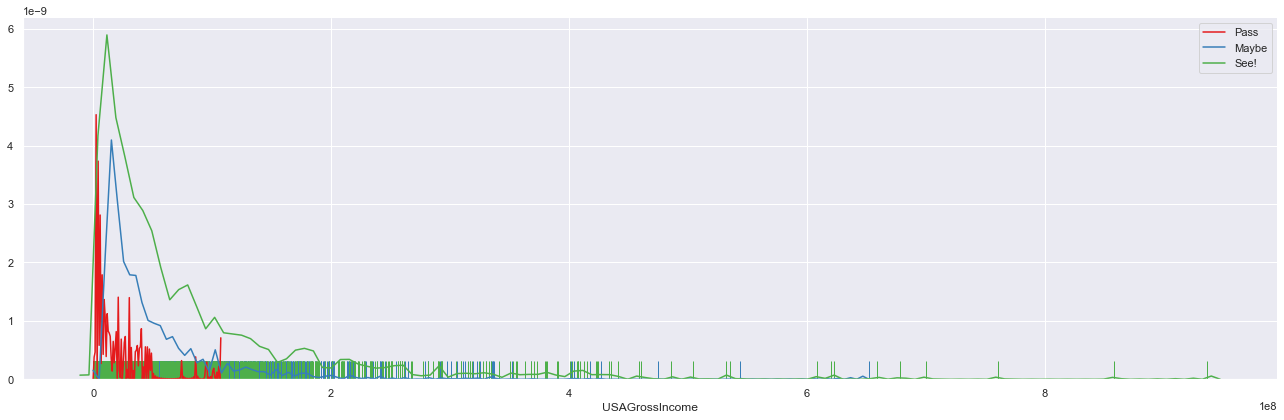

In [157]:
# Distribution of films based on AvgVoteClass and income generated.
g = sns.FacetGrid(USMoviesDf2, hue="AvgVoteClass", palette="Set1", height=6, aspect=3)
g = (g.map(sns.distplot, "USAGrossIncome", hist=False, rug=True))
plt.legend()
plt.show()


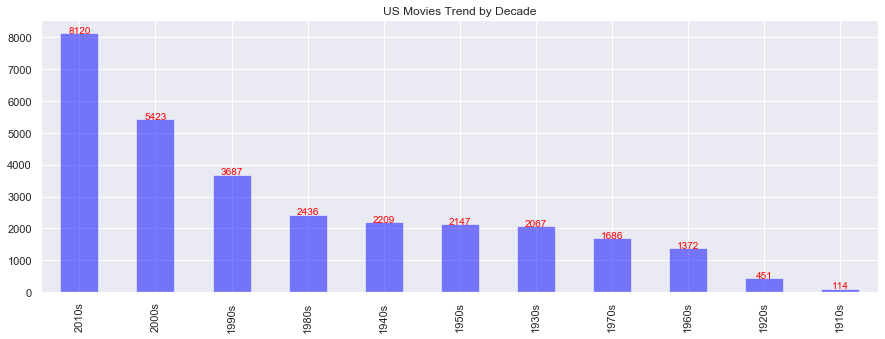

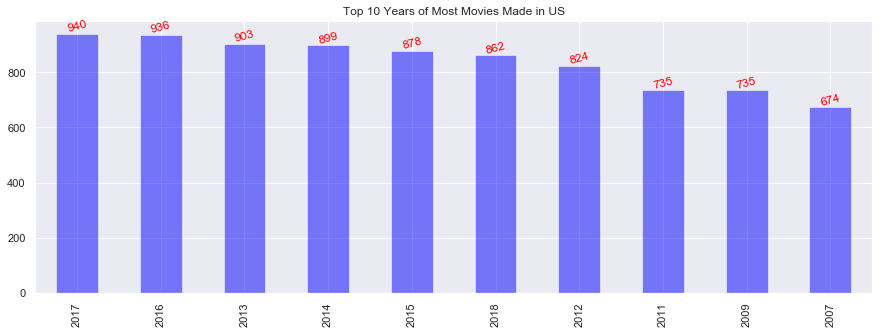

In [176]:
# Trends of how many movies made in the US?
USMoviesDf2['Decade'].value_counts().plot(kind='bar', color="blue", alpha=0.5, figsize=(15,5))
plt.title('US Movies Trend by Decade')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='baseline', rotation=0) 
plt.show()


# Choose the Top 10 years of movies produced
USMoviesDf2['year'].value_counts()[0:10].plot(kind='bar', color="blue", alpha=0.5, figsize=(15,5))
plt.title('Top 10 Years of Most Movies Made in US')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=15)

plt.show()


In [177]:
HighGross = USMoviesDf2.loc[USMoviesDf2['RevenueClass'] == '>$500M']
HighGross.sort_values(by='USAGrossIncome', ascending=False)


,year,Decade,month,title,1stWriter,1stDirector,1stLanguage,lead_country,lead_actor,genre1,...,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,RevenueClass,IncBudDiff,IncPercentofBud,USAGrossIncome
65123,2015,2010s,12,Star Wars: Episode VII - The Force Awakens,Lawrence Kasdan,J.J. Abrams,English,USA,Harrison Ford,Action,...,4548.0,883.0,7.9,See!,245000000.0,<=$250,>$500M,691662225.0,282.311112,936662225.0
71243,2019,2010s,4,Avengers: Endgame,Christopher Markus,Anthony Russo,English,USA,Robert Downey Jr.,Action,...,8302.0,531.0,8.5,See!,356000000.0,<=$500M,>$500M,502373000.0,141.116011,858373000.0
48072,2009,2000s,12,Avatar,James Cameron,James Cameron,English,USA,Sam Worthington,Action,...,3304.0,727.0,7.8,See!,237000000.0,<=$250,>$500M,523507625.0,220.889293,760507625.0
60062,2018,2010s,2,Black Panther,Ryan Coogler,Ryan Coogler,English,USA,Chadwick Boseman,Action,...,3062.0,664.0,7.3,See!,200000000.0,<=$250,>$500M,500059566.0,250.029783,700059566.0
71242,2018,2010s,4,Avengers: Infinity War,Christopher Markus,Anthony Russo,English,USA,Robert Downey Jr.,Action,...,4111.0,591.0,8.5,See!,321000000.0,<=$500M,>$500M,357815482.0,111.468998,678815482.0
30262,1997,1990s,1,Titanic,James Cameron,James Cameron,English,USA,Leonardo DiCaprio,Drama,...,2721.0,324.0,7.8,See!,200000000.0,<=$250,>$500M,459363944.0,229.681972,659363944.0
42553,2015,2010s,6,Jurassic World,Rick Jaffa,Colin Trevorrow,English,USA,Chris Pratt,Action,...,1489.0,688.0,7.0,Maybe,150000000.0,<=$250,>$500M,502270625.0,334.847083,652270625.0
49418,2012,2010s,4,The Avengers,Joss Whedon,Joss Whedon,English,USA,Robert Downey Jr.,Action,...,1859.0,738.0,8.0,See!,220000000.0,<=$250,>$500M,403357910.0,183.344505,623357910.0
65276,2017,2010s,12,Star Wars: Episode VIII - The Last Jedi,Rian Johnson,Rian Johnson,English,USA,Mark Hamill,Action,...,6218.0,690.0,7.1,See!,317000000.0,<=$500M,>$500M,303181382.0,95.640815,620181382.0
69387,2018,2010s,7,Incredibles 2,Brad Bird,Brad Bird,English,USA,Craig T. Nelson,Animation,...,1033.0,385.0,7.7,See!,200000000.0,<=$250,>$500M,408581744.0,204.290872,608581744.0


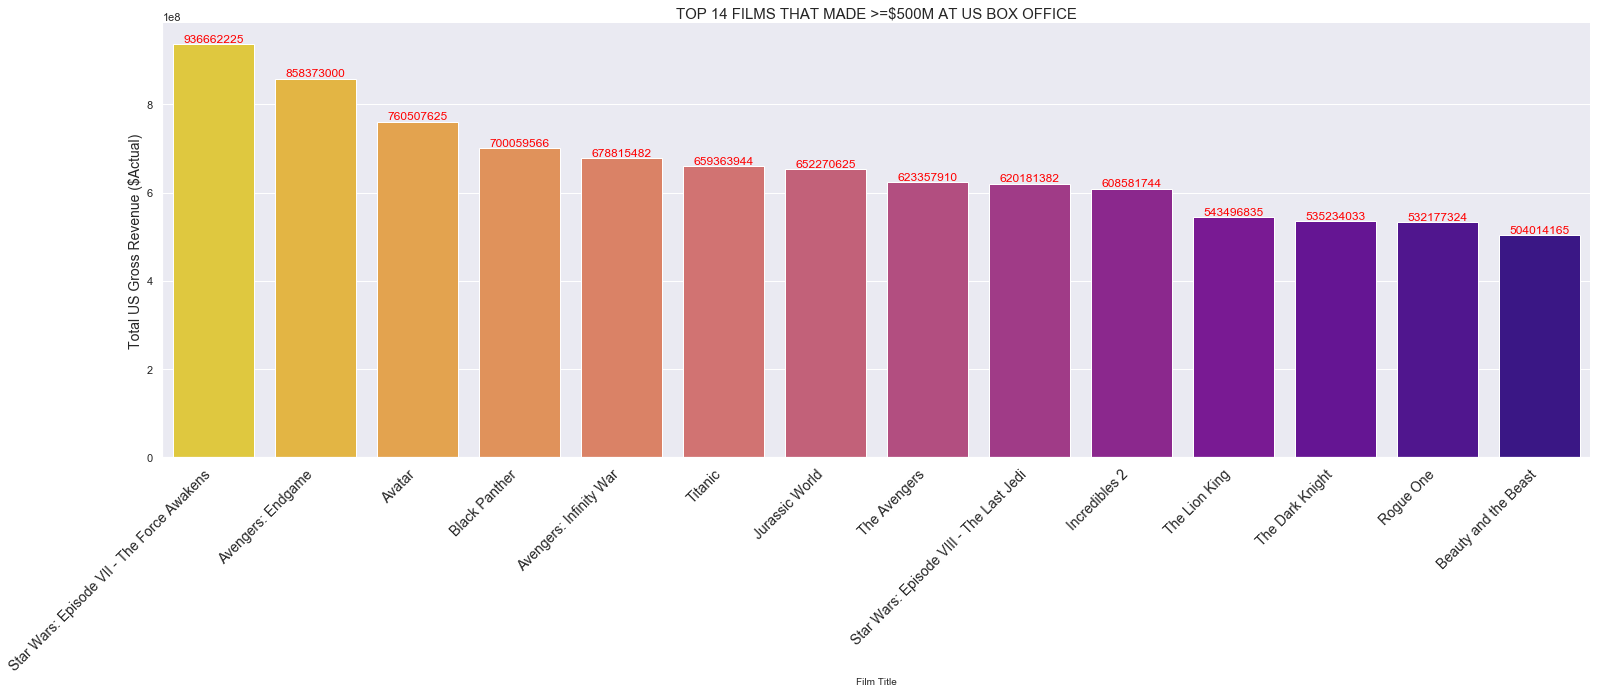

In [178]:
sns.catplot(x="title", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="plasma_r", data=HighGross, order=HighGross.sort_values('USAGrossIncome',ascending = False).title)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14)
plt.title('TOP 14 FILMS THAT MADE >=$500M AT US BOX OFFICE', fontsize=15)
plt.xlabel('Film Title', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=14)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % (p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

### 14 US films grossed over $500M domestically and had profitability of 95%-334%. Ten of them were action films, 2 animation, 1 drama and 1 family.


### Significantly more films were made in 2010s than in other decades before. This decade had nearly 50%, almost 700, more films produced than in the second most decade, 2000s.  Furthermore, 2010s can boast of having 10 of the top 14 grossing films.


In [179]:
# Get % of films in the categories listed in RevClass
USMoviesDf2['RevenueClass'].value_counts(normalize=True) #normalize = number (False) or % (True)

### Historically, 32% (2,879) of US films made revenue of $1M or less, 60% (5,350) are over $1M to $100M, 6% (563) are over $100M to $250M, 1% (96) are over $250M to $500M, and 0.1% (14) make over $500M.


<=$100M    0.600989
<=$1M      0.323410
<=$250     0.063244
<=$500M    0.010784
>$500M     0.001573
Name: RevenueClass, dtype: float64

In [198]:
filt2 = ['duration', 'avg_vote', 'budget', 'USAGrossIncome']
corr = USMoviesDf2[filt2].corr()
corr

,duration,avg_vote,budget,USAGrossIncome
duration,1.000000,0.242756,0.295135,0.264446
avg_vote,0.242756,1.000000,0.166513,0.207378
budget,0.295135,0.166513,1.000000,0.763373
USAGrossIncome,0.264446,0.207378,0.763373,1.000000


In [196]:
# Using the OLS Regression Model in the statsmodel.api library to create a regression equation that models 
# USAGrossIncome against all your independent variables

import statsmodels.api as sm
from statsmodels.formula.api import ols

filt3 = ['duration', 'avg_vote', 'budget']

X = USMoviesDf2[filt3] #independent factors
Y = USMoviesDf2['USAGrossIncome'] #dependent factor
X = sm.add_constant(X) # adding a constant term to the predictor for y-int

model = sm.OLS(Y,X)
results = model.fit() 
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         USAGrossIncome   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 1.425e+04
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:42:11   Log-Likelihood:            -5.4417e+05
No. Observations:               29712   AIC:                         1.088e+06
Df Residuals:                   29708   BIC:                         1.088e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.477e+07   7.93e+05    -18.625      0.000   -1.63e+07   -1.32e+07
duration    4.845e+04   7265.158      6.668      0.000    3.42e+04    6.27e+04
avg_vote    2.034e+06   1.01e+05     20.073      0.000    1.84e+06    2.23e+06
budget         1.2132      0.006    190.004      0.000       1.201       1.226
==============================================================================
Omnibus:                    37136.523   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15795364.495
Skew:                           6.462   Prob(JB):                         0.00
Kurtosis:                     115.213   Cond. No.                     1.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

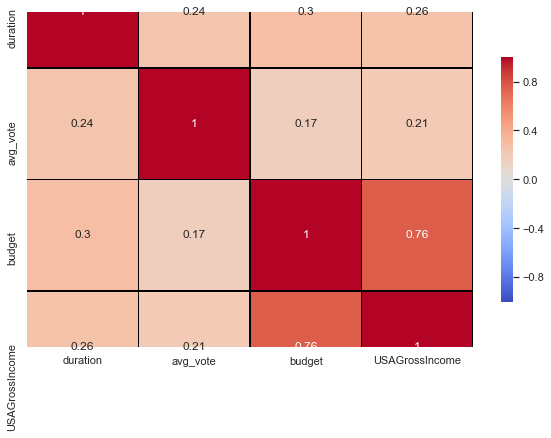

In [189]:
#Heatmap of USMoviesDf2.corr
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr, cbar_kws={"shrink": .5}, annot=True, vmin=-1, vmax=1, center= 0, fmt='.2g', cmap= 'coolwarm', linewidths=.5, linecolor='black', square=True)


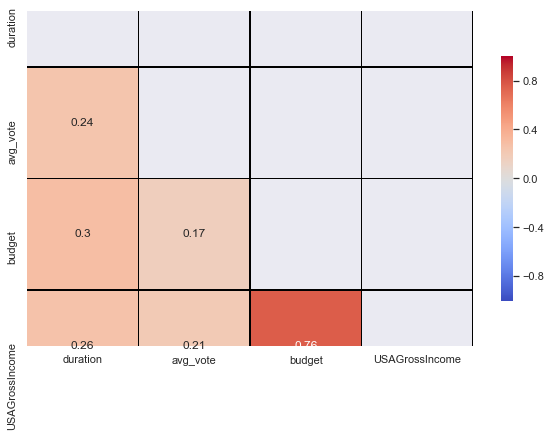

In [195]:
f, ax = plt.subplots(figsize=(10, 9))
matrix = np.triu(corr) #matrix and mask (upper triangle) to do lower triangle correlation heatmap
sns.heatmap(corr, mask=matrix, cbar_kws={"shrink": .5}, annot=True, vmin=-1, vmax=1, center= 0, fmt='.2g', cmap= 'coolwarm', linewidths=.5, linecolor='black', square=True)


# STEP 4: INSIGHTS AND DISCUSSIONS OF ANALYSIS

In [199]:
# Saving USMoviesDf2 to excel

# create excel writer object
writer = pd.ExcelWriter('USMoviesDf2.xlsx')
# write dataframe to excel
USMoviesDf2.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
